# Вступительное задание в ЛШ2017 DATASCIENCE
#   drunkfridayfallsimulation

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy

#для данной задачи создадим функцию которая будет выдавать нам случайные значения из определенного диапозона
def nm(a, b):
    x = random.randint(a, b)
    return x

In [1]:
#создадим функцию которая имитирует amauntofstep шагов пьяного пятницы, который находится в step шагах от обрыва
#если он свалитвается с обрыва функция возвращает 1
def cycle(amauntofstep, step):
    z = 0
    while amauntofstep > 0:
        amauntofstep = amauntofstep - 1
        if nm(0, 1000000)/1000000 >= 2/3:
            step = step + 1
        else:
            step = step - 1
        
        if step == 0:
            
            z = z + 1
            break
    return  z


In [2]:
#наконец запишем функцию имитирующая множество итераций блужданий пьяного пятницы , в итоге возвращающая нам вероятность падения
#почему именно вероятность падения?
#потомучто она находится легче аналитически и в дальнейшем будет проще оценить погрешность
def drunkfridayfallsimulation(itercation, amauntofstep, step ):
    numberofiterations = itercation
    fallnumber = 0
    while itercation > 0:
        itercation = itercation - 1
       
        l = cycle(amauntofstep, step) 
       
        if l > 0:
            fallnumber = fallnumber + 1
       
    return  fallnumber/numberofiterations


Параметр itercation помогает настроить точность, возврящаемой функцией, вероятности, чем больше параметр тем больше точность, но и тем больше времени требуется машине для вычислений.

In [47]:
#продемонстрируем работоспособность, найдем вероятность того что пятница не свалился спустя 5 шагов

alive_probability = 1 - drunkfridayfallsimulation(10000, 5, 2 )
alive_probability
print ("вероятность того что пятница не свалился %s " % alive_probability)

вероятность того что пятница не свалился 0.35240000000000005 


In [48]:
#проверим насколько наш результат отличается от аналитического
#т.к фкункция drunkfridayfallsimulation возвращает вероятность падения, то достаточно 
#сравнить нашу вероятность падения с аналитической, ошибка будет
#такая же как и при сравнении вероятностей того, что пятница не свалился
p = 2/3
analytprobability = p**2 +2*(1-p)*p**3
eror = drunkfridayfallsimulation(10000,5, 2 ) - analytprobability
print ("ошибка в измерениях равняется %s " % eror)

ошибка в измерениях равняется 0.001124691358024732 


In [49]:
#напишем "функцию" принимающую произвольное число шагов N и возвращающую вероятность того что после этих N шагов пьяница жив
alive_probability = 1 - drunkfridayfallsimulation(10000, int(input('Введите число шагов N = ')), 2 )
alive_probability 

Введите число шагов N = 5


0.35329999999999995

In [50]:
#построим график с помощью нашей функции симуляции пьяного пятницы 


x =  np.linspace(0, 20, 20)
y = scipy.array([(1-drunkfridayfallsimulation(5000, i, 2 )) for i in range(20) ])#z = np.random.random(100)

fig = plt.figure()
plt.errorbar(x, y, xerr=0, yerr=0.005)
plt.title('alive friday probability')
plt.grid(True)
#plt.show()



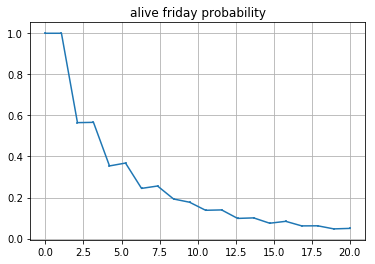

In [51]:
plt.show()